In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Cars93.csv')
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [4]:
data.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
keys = ['Weight','Horsepower','Length','RPM']
y = ['Price']

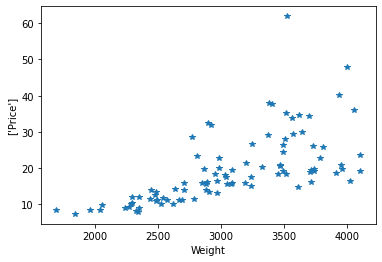

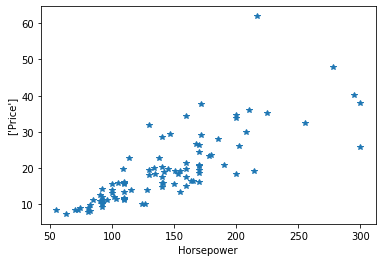

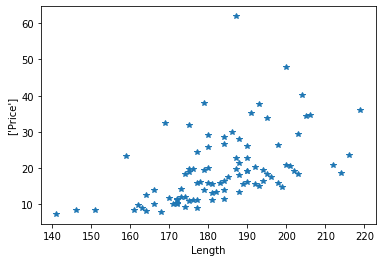

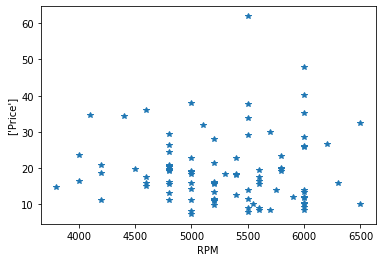

In [6]:
for k in keys:
    plt.plot(data[k],data[y],'*')
    plt.xlabel(k)
    plt.ylabel(y)
    plt.show()

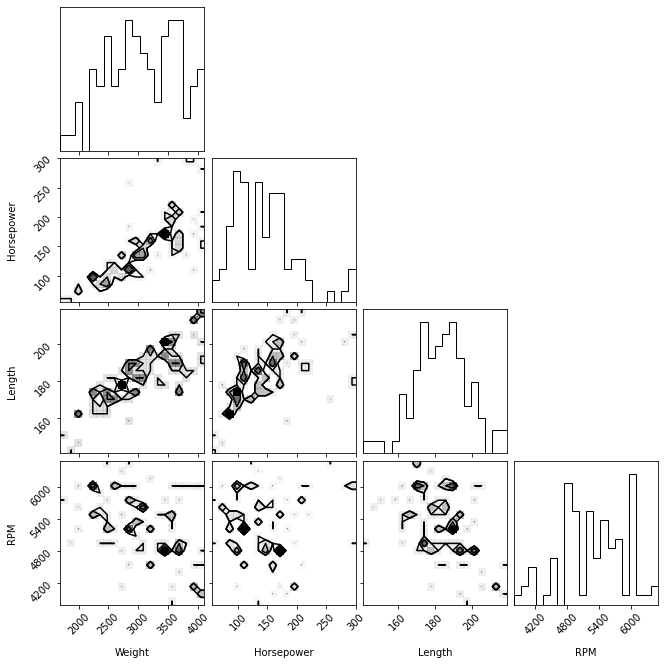

In [7]:
import corner

figure = corner.corner(data[keys], labels=keys)

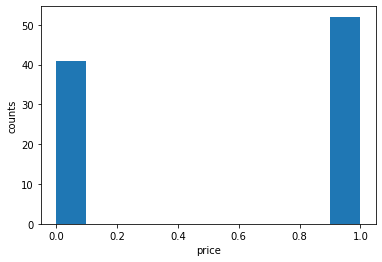

In [8]:
Y = np.array(data[y])

Y[Y<=16] = 0 #Economicos
Y[Y>16] = 1 #Costosos

plt.hist(Y)
plt.xlabel('price')
plt.ylabel('counts')
plt.show()

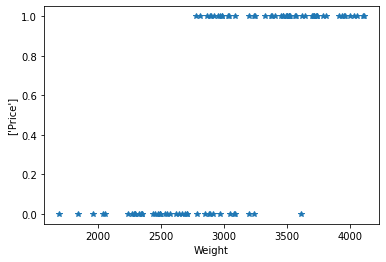

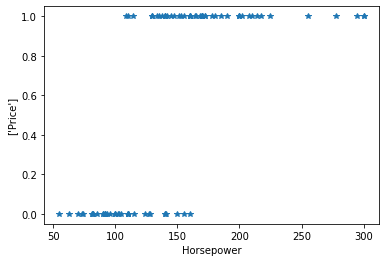

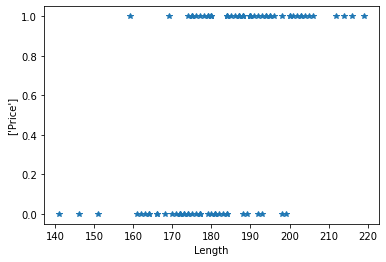

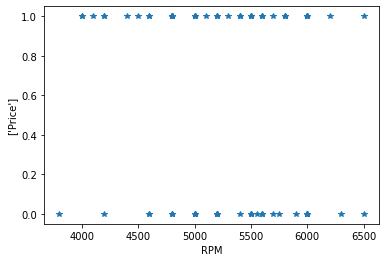

In [9]:
for k in keys:
    plt.plot(data[k],Y,'*')
    plt.xlabel(k)
    plt.ylabel(y)
    plt.show()

### Hipótesis

Los paramteros Weight y HorsePower pueden ser los paramatros más importante para predecir el precio de un carro.

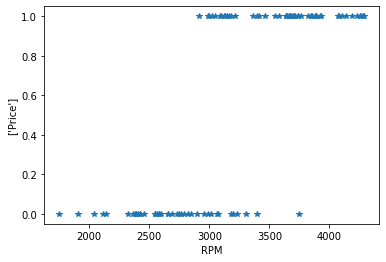

In [15]:
# Probar un modelo lineal
plt.plot(data['Weight']+(data['Horsepower']),Y,'*')
plt.xlabel(k)
plt.ylabel(y)
plt.show()

## Comprobando la hipótesis

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[keys],Y)

In [18]:
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

/home/debian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [19]:
acc = sum(Y_pred == np.ravel(Y_test))/len(Y_test)
acc

0.875

In [20]:
importances = model.feature_importances_
importances

array([0.39485487, 0.3875107 , 0.12760156, 0.09003287])

In [21]:
ii = np.argsort(importances)
np.array(keys)[ii][::-1]

array(['Weight', 'Horsepower', 'Length', 'RPM'], dtype='<U10')